In [1]:
df<-read.csv('d:/data/ozone/ozone4.csv')
head(df)

Ozone,Solar.R,Solar.R2,Wind,Temp,Month,Day,Ozone2,Result
41,190,190.0000,7.4,67,5,1,41.00000,0
36,118,118.0000,8.0,72,5,2,36.00000,0
12,149,149.0000,12.6,74,5,3,12.00000,0
18,313,313.0000,11.5,62,5,4,18.00000,0
NA,NA,185.9315,14.3,56,5,5,42.12931,0
28,NA,185.9315,14.9,66,5,6,28.00000,0


In [2]:
library(dplyr)
df<-df %>% select(-Ozone,-Solar.R,-Month,-Day,-Ozone2)
dim(df)
head(df)

Warning message:
"package 'dplyr' was built under R version 3.6.2"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



[1] 153   4

Solar.R2,Wind,Temp,Result
190.0000,7.4,67,0
118.0000,8.0,72,0
149.0000,12.6,74,0
313.0000,11.5,62,0
185.9315,14.3,56,0
185.9315,14.9,66,0



  0   1 
109  44 

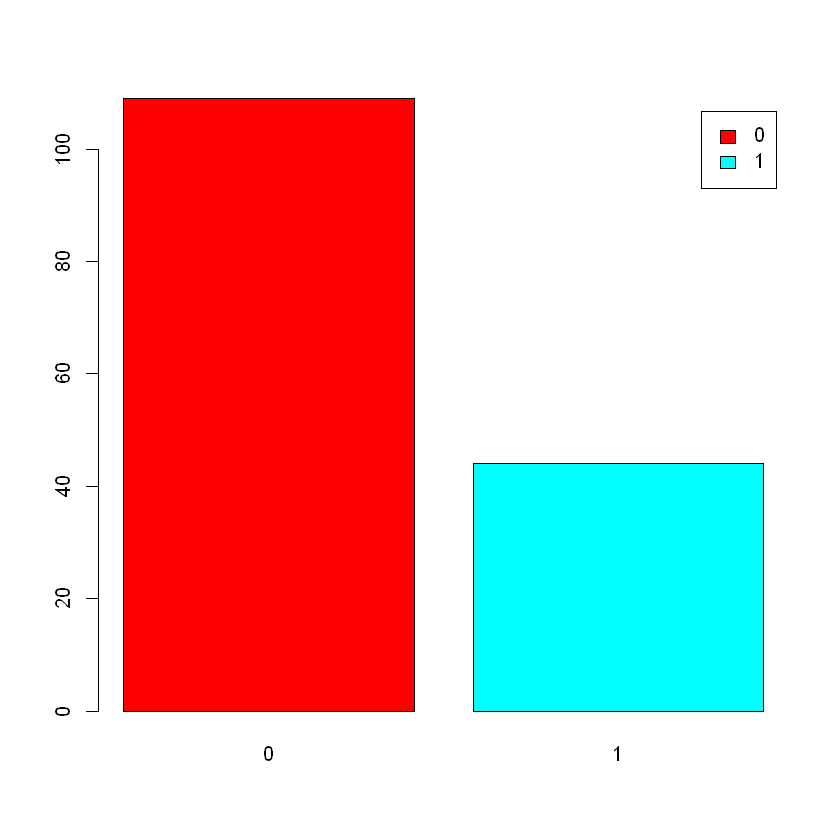

In [3]:
(tbl<-table(df$Result))
barplot(tbl,beside=T,legend=T,col=rainbow(2))

In [4]:
library(ROSE)
df_samp<-ovun.sample(Result ~. , data=df, seed=1, method='under',
                    N=44*2)$data
(tbl<-table(df_samp$Result))

Warning message:
"package 'ROSE' was built under R version 3.6.2"Loaded ROSE 0.0-3




 0  1 
44 44 

In [5]:
library(caret)
set.seed(123)
#학습용,검증용 8:2로 구분
idx_train<-createDataPartition(y=df$Result, p=0.8,list=F)
train<-df[idx_train,]
X_train<-train[,-4]
y_train<-train[,4]
test<-df[-idx_train,]
X_test<-test[,-4]
y_test<-test[,4]

Loading required package: lattice
Warning message:
"package 'lattice' was built under R version 3.6.2"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.2"

Warning message:
"package 'reshape' was built under R version 3.6.2"
Attaching package: 'reshape'

The following object is masked from 'package:dplyr':

    rename

Using  as id variables


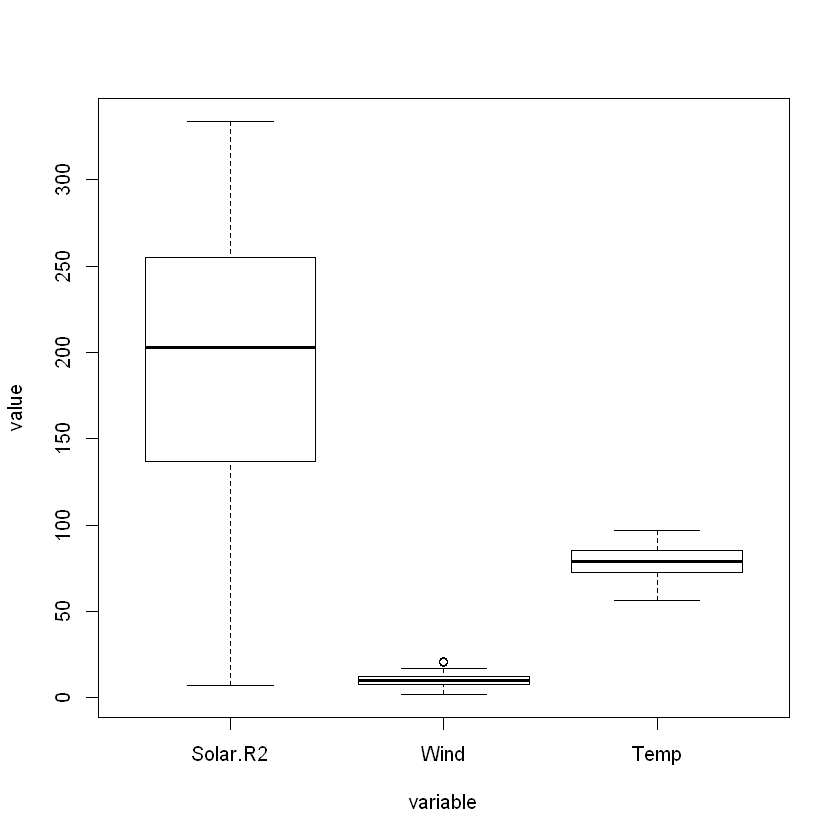

In [6]:
library(reshape)
#정규화를 하지 않은 상태의 박스플롯
meltData<-melt(X_train)
boxplot(data=meltData,value~variable)

In [7]:
#정규화 작업(변수들의 상호비교가 가능하도록 평균, 표준편차를 맞추는 과정)
X_train_scaled<-as.data.frame(scale(X_train))
X_test_scaled<-as.data.frame(scale(X_test))
#종속변수를 붙인 데이터프레임
train_scaled<-cbind(X_train_scaled,Result=y_train)
test_scaled<-cbind(X_test_scaled,Result=y_test)

Using  as id variables


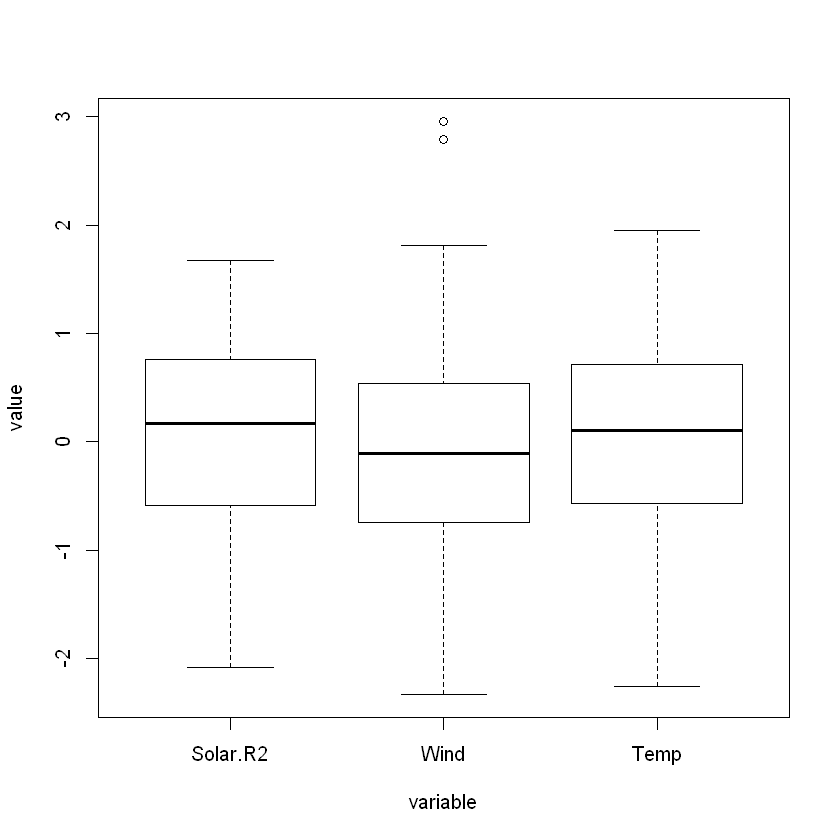

In [8]:
#정규화 이후의 박스플롯
meltData<-melt(X_train_scaled)
boxplot(data=meltData,value~variable)

In [9]:
library(nnet)
#인공신경망 모형 size 은닉층의 노드 갯수
model<-nnet(Result ~ . , data=train_scaled, size=20)
summary(model)
# 3-10-1
# input layer(입력층) 노드수 : 3 (독립변수의 갯수)
# hidden layer(은닉층) 노드수 : 10
# output layer(출력층) 노드수 : 1
# weights : 가중치

# weights:  101
initial  value 36.703961 
final  value 36.000000 
converged


a 3-20-1 network with 101 weights
options were -
 b->h1 i1->h1 i2->h1 i3->h1 
  2.08  -0.53   1.24  -0.93 
 b->h2 i1->h2 i2->h2 i3->h2 
  0.64   0.44   0.04  -0.09 
 b->h3 i1->h3 i2->h3 i3->h3 
 -0.16   0.11   0.08  -0.46 
 b->h4 i1->h4 i2->h4 i3->h4 
 -1.73   1.11  -0.47   1.05 
 b->h5 i1->h5 i2->h5 i3->h5 
 -2.23   0.54  -1.20   2.09 
 b->h6 i1->h6 i2->h6 i3->h6 
 -2.21   0.13  -0.97   0.99 
 b->h7 i1->h7 i2->h7 i3->h7 
 -0.84  -0.29   0.14   0.87 
 b->h8 i1->h8 i2->h8 i3->h8 
 -2.50   0.15  -0.76   1.61 
 b->h9 i1->h9 i2->h9 i3->h9 
 -0.38  -0.44  -0.51   0.05 
 b->h10 i1->h10 i2->h10 i3->h10 
  -0.77   -0.36    0.03   -0.36 
 b->h11 i1->h11 i2->h11 i3->h11 
   1.24   -0.36    0.45   -0.27 
 b->h12 i1->h12 i2->h12 i3->h12 
   1.34   -0.36    1.05   -0.34 
 b->h13 i1->h13 i2->h13 i3->h13 
   2.75   -0.74    1.59   -2.10 
 b->h14 i1->h14 i2->h14 i3->h14 
   0.07    0.28    0.57    0.18 
 b->h15 i1->h15 i2->h15 i3->h15 
  -2.16    0.41   -1.87    1.38 
 b->h16 i1->h16 i2->h16 i3->h16 


In [10]:
names(model) #신경망 모형의 정보
head(model$wts) #최적의 가중치 집합

[1] "n"             "nunits"        "nconn"         "conn"         
 [5] "nsunits"       "decay"         "entropy"       "softmax"      
 [9] "censored"      "value"         "wts"           "convergence"  
[13] "fitted.values" "residuals"     "call"          "terms"        
[17] "coefnames"     "xlevels"

[1]  2.0847435 -0.5253579  1.2441866 -0.9326975  0.6433384  0.4387914

In [11]:
#install.packages("devtools")

Warning message:
"package 'devtools' was built under R version 3.6.2"Loading required package: usethis
Warning message:
"package 'usethis' was built under R version 3.6.2"SHA-1 hash of file is bf3c7b8ac910823b729e3ce73bb6ab5e6955ad3d
Loading required package: scales
Warning message:
"package 'scales' was built under R version 3.6.2"

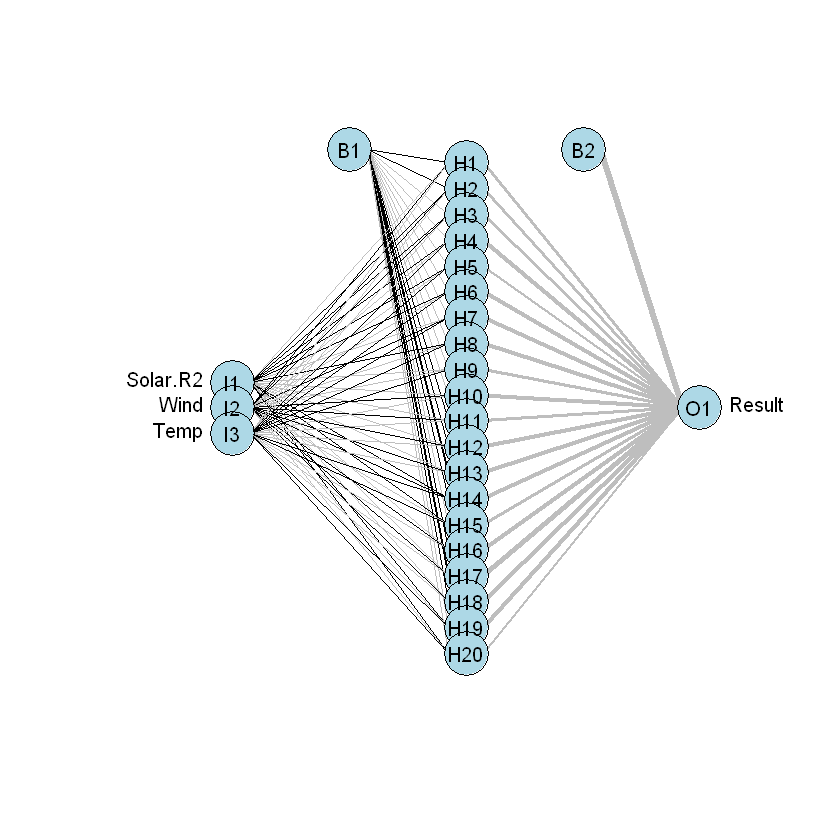

In [12]:
#인공신경망 그래프
library(devtools)

source_url('https://gist.githubusercontent.com/Peque/41a9e20d6687f2f3108d/raw/85e14f3a292e126f1454864427e3a189c2fe33f3/nnet_plot_update.r')

plot.nnet(model)

In [13]:
#install.packages("NeuralNetTools")

Warning message:
"package 'NeuralNetTools' was built under R version 3.6.2"

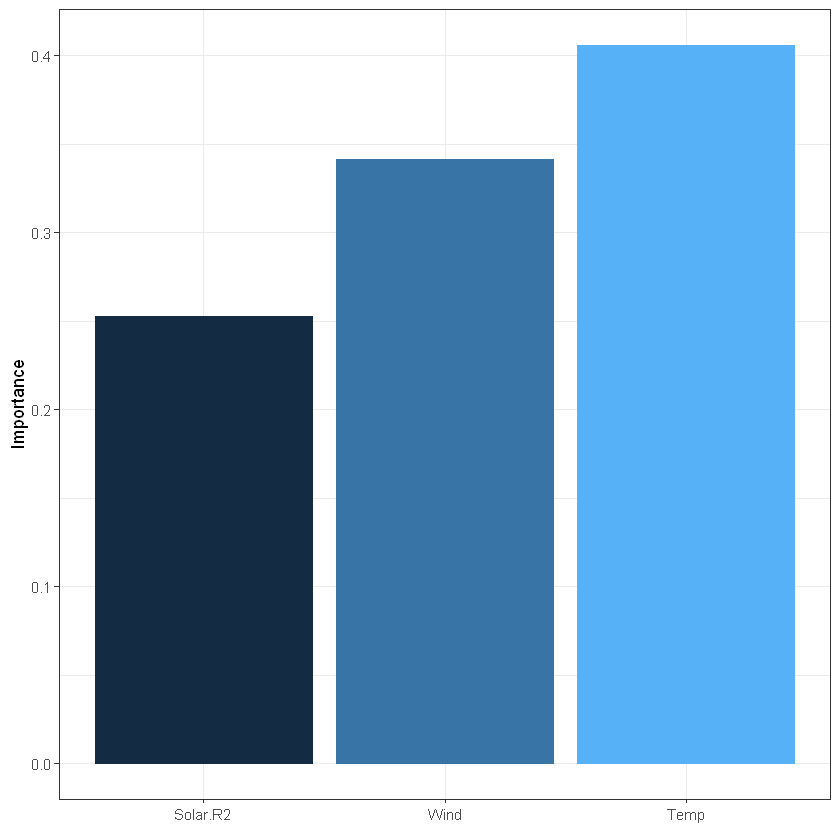

In [14]:
library(NeuralNetTools)
garson(model) #변수의 중요도 그래프

In [15]:
#학습용 데이터셋의 예측 정확도
pred<-predict(model,X_train_scaled) #모형이 예측한 값
result<-round(pred) #반올림 처리
#result
table(y_train,result) #오분류표
mean(y_train==result) #예측정확도

       result
y_train  0
      0 87
      1 36

[1] 0.7073171

In [17]:
#검증용 데이터셋의 예측 정확도
pred<-predict(model,X_test_scaled)
result<-round(pred)
table(y_test,result)
mean(y_test==result)

      result
y_test  0
     0 22
     1  8

[1] 0.7333333